In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:\\Pandasdata\\DT_files\\baseball.csv")

In [3]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
# W-Winnings is the output variable
 #Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases,
        # Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

In [5]:
df['CG']

0      2
1      2
2     11
3      7
4      7
5      7
6      3
7      0
8      1
9      3
10     5
11     5
12     2
13     6
14     5
15     1
16     0
17     6
18     1
19     2
20     1
21     4
22     0
23     3
24     1
25     6
26     7
27     1
28     1
29     4
Name: CG, dtype: int64

In [6]:
# Let us check the null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [7]:
# No Null Values

In [8]:
# Let us check the datatypes
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [9]:
df_corr = df.corr()

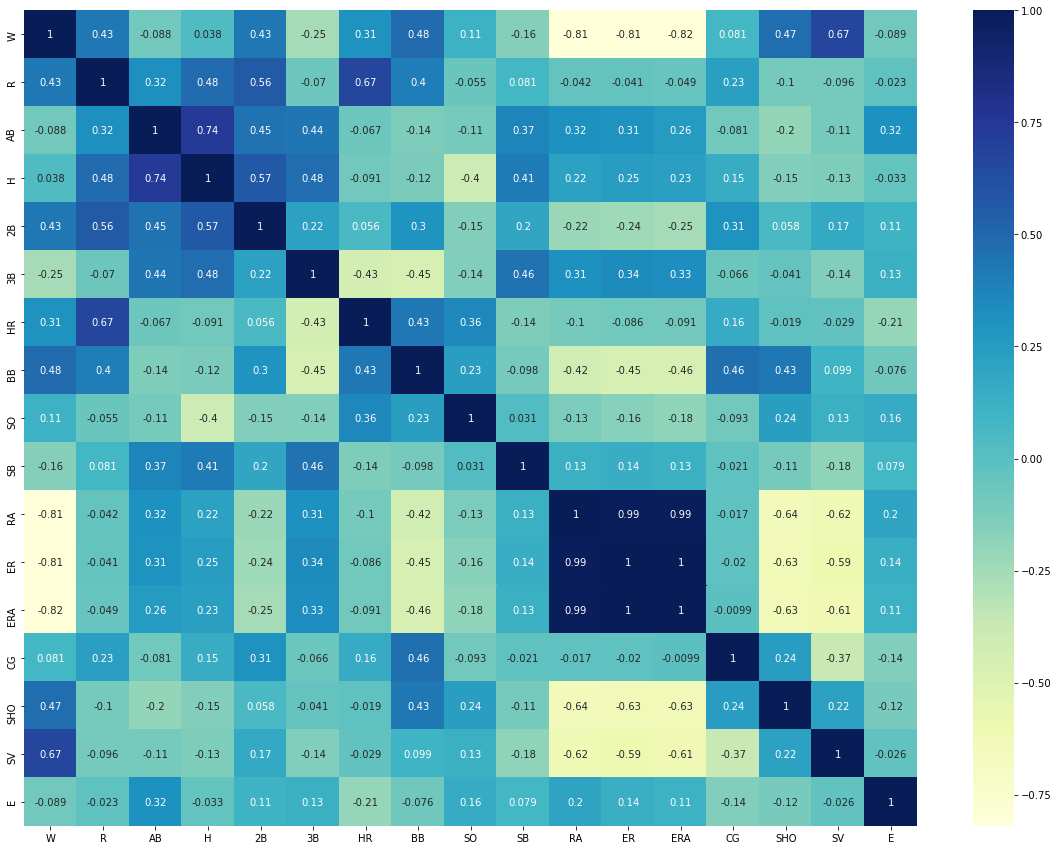

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(df_corr, cmap ='YlGnBu', annot = True)

In [11]:
# W has high correlation with SV, SHO,BB,HR,2B and R

 #Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts,Stolen Bases,
        # Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, and Errors

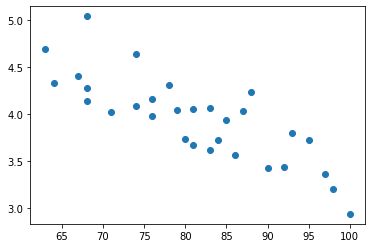

In [12]:
plt.scatter(df['W'],df['ERA'])

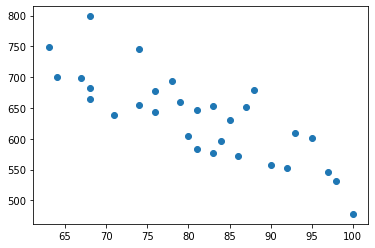

In [13]:
plt.scatter(df['W'],df['ER'])

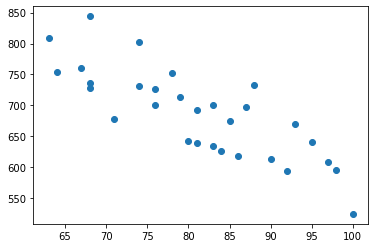

In [14]:
plt.scatter(df['W'],df['RA'])

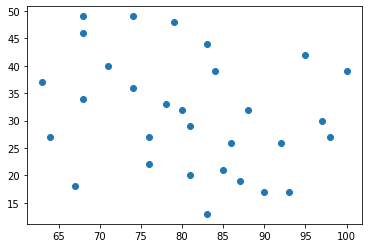

In [15]:
plt.scatter(df['W'],df['3B'])

In [16]:
# We can see that IV like SV, SHO,BB are having some linear relationship with 'W'

In [17]:
# Check the skewness of data
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [18]:
# Let us treat the skewness
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    if df.skew().loc[col]<-0.55:
        df[col]=np.log1p(df[col])

In [19]:
df.skew()

W      0.047089
R      0.744813
AB     0.183437
H      0.628584
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG    -0.325962
SHO   -0.943750
SV     0.163057
E      0.632916
dtype: float64

In [20]:
# Let us remove the Outliers
from scipy.stats import zscore

In [21]:
z = np.abs(zscore(df))

In [22]:
treshold=3
print(np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [23]:
#Only one outlier. Let us remove it
df_new = df[(z<3).all(axis =1)]

In [24]:
df.shape

(30, 17)

In [25]:
df_new.shape

(29, 17)

In [26]:
df_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [27]:
df_new.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,83,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,81,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,76,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,74,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [28]:
# Now we will split the data in to x and y (dependant and independant)

In [29]:
x =df_new.drop('W', axis =1)
y = df_new['W']
# saving the x for future changes
X =x

In [30]:
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [31]:
y

0      95
1      83
2      81
3      76
4      74
6      87
7      81
8      80
9      78
10     88
11     86
12     85
13     76
14     68
15    100
16     98
17     97
18     68
19     64
20     90
21     83
22     71
23     67
24     63
25     92
26     84
27     79
28     74
29     68
Name: W, dtype: int64

In [32]:
# We will start the process of creating the model.

# This is a regression problem. So we apply various algorithms and see which is having high accuracy.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [34]:
ss= StandardScaler()

In [35]:
x=ss.fit_transform(x)

In [36]:
from sklearn. linear_model import LinearRegression

In [37]:
def maxr2score(algo,x,y):
    maxr2=0
    
    for r_state in range(1,29):
        x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=r_state, test_size=0.3)
        algo.fit(x_train,y_train)
        pred=algo.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        
        if r2_scr > maxr2:
            maxr2=r2_scr
            final_r_state = r_state
    print("Max R2 score corresponding to random state ",final_r_state,"is: ", maxr2)

In [38]:
algo =LinearRegression()
maxr2score(algo,x,y)

Max R2 score corresponding to random state  17 is:  0.7739947351828458


In [39]:
cross_val_score(algo,x,y,cv=5, scoring='r2').mean()

-0.05899112837819469

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr =SVR()
parameters = {'kernel':('poly','linear','rbf')}
clf = GridSearchCV(svr, parameters, cv=5, scoring='r2')
clf.fit(x,y)
clf.best_params_

{'kernel': 'linear'}

In [41]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9488377720210829


In [42]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.4106316929207157

In [43]:
# Here we can see that the model is overfitting

# We will use Feature selection and do Feature Engineering to improve the acuracy and decrease the overfitting

In [44]:
# We use Univariate Selection

#selecting Features that are having strongest relationship with output variable

#### Univariate Feature Selection

In [45]:
from sklearn.feature_selection import SelectKBest, chi2

In [46]:
# There are totally 16 features. Let us consider that we select 12 (Trail and error basis) Features which have strong relationship
#and use those to create a model and test the r2 and cv scores.

In [47]:
bestfeatures = SelectKBest(score_func=chi2, k=12)
fit =bestfeatures.fit(X,y)

In [48]:
# Let us create a DataFrame to show the values
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [49]:
# Let us Concat the two for better visualization
featurescores = pd.concat([dfcolumns,dfscores], axis =1)
featurescores.columns = ['Feature','Score']

In [50]:
featurescores

,Feature,Score
0,R,0.017554
1,AB,22.339380
2,H,0.004410
3,2B,22.757121
4,3B,69.598698
5,HR,114.119949
6,BB,139.722802
7,SO,204.888061
8,SB,166.997587
9,RA,197.101792


In [51]:
print(featurescores.nlargest(12,'Score'))

   Feature       Score
7       SO  204.888061
9       RA  197.101792
10      ER  191.050119
8       SB  166.997587
6       BB  139.722802
5       HR  114.119949
4       3B   69.598698
3       2B   22.757121
1       AB   22.339380
12      CG    6.585141
11     ERA    1.298537
13     SHO    0.199557


In [52]:
# here we can observe that in correlation matrix 'Runs' (R) correlation coeff is 0.4 which is effecting the output value.But here 
# there 'R' is of low score which effect the o/p value.

# So let us check another feature selection method and findout the best features

### Feature Importance 

In [53]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [54]:
print(model.feature_importances_)

[0.06038986 0.01043552 0.01744815 0.01792637 0.01142362 0.02312993
 0.02377944 0.02992107 0.01128283 0.20843043 0.15018928 0.21169244
 0.01253432 0.02139216 0.17146244 0.01856215]


In [55]:
X.columns

Index(['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'E'],
      dtype='object')

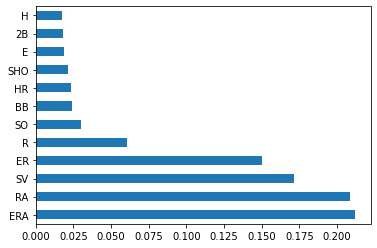

In [56]:
# plotting graph for better visualisation
fea_imp =pd.Series(model.feature_importances_, index=X.columns)
fea_imp.nlargest(12).plot(kind='barh')
plt.show()

In [57]:
# Hola, Here we can see the difference. 

# R is among the top 12. let us drop the lowest 4/5 features, create model and test r2 and CV scores.

In [58]:
# let us remove AB,3B,SB,CG in steps and calculate the cv scores
x1 =X.drop('3B', axis =1)

In [59]:
x1.head()

,R,AB,H,2B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,6.546785,5467,7.207860,277,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,6.507278,5439,7.241366,303,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,6.434547,5533,7.231287,260,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,6.536692,5605,7.323831,289,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [60]:
x=ss.fit_transform(x1)

In [61]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9260699513530601


In [62]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.41882705505540463

In [63]:
# Very little improvement in CV score

In [64]:
x2=X.drop('AB', axis =1)

In [65]:
x2.head()

,R,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,6.546785,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,6.507278,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,6.434547,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,6.536692,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [66]:
X.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [67]:
x=ss.fit_transform(x2)

In [68]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9401225041355509


In [69]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.4277210965921703

In [70]:
# Model Improved. We can remove

In [71]:

x3=X.drop('H', axis =1)

In [72]:
x=ss.fit_transform(x3)

In [73]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9488820943710752


In [74]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.466976971243808

In [75]:
# removing 'H' Increased our r2 and CV,(94/0.41 to 94/0.46) so we will remove this

In [76]:

x4=X.drop('CG', axis =1)

In [77]:
x4.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,6.586172,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.162283,4.043051,4.488636
1,6.546785,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.271150,3.828641,4.465908
2,6.507278,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,1.223156,3.663562,4.382027
3,6.434547,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,1.194706,3.637586,4.624973
4,6.536692,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,1.271150,3.583519,4.465908


In [78]:
x=ss.fit_transform(x4)

In [79]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9311182350331427


In [80]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.38670084213198636

In [81]:
# We should not remove this aswell as it decreased the cross val score

In [82]:
#Let us remove error (E) and check the CV 

In [83]:
x5=X.drop('E', axis =1)

In [84]:
x=ss.fit_transform(x5)

In [85]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.943836215418154


In [86]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.41158846878746136

In [87]:
# we should not remove this.
#let us remove all the 5 columns and check CV once

In [88]:
x6=X.drop('3B', axis =1)
x6=x6.drop('AB', axis =1)
x6=x6.drop('H', axis =1)
x6=x6.drop('CG', axis =1)
x6=x6.drop('E', axis =1)

In [89]:
x6.head()

,R,2B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV
0,6.586172,300,139,383,973,104,641,601,3.73,1.162283,4.043051
1,6.546785,277,156,439,1264,70,700,653,4.07,1.271150,3.828641
2,6.507278,303,141,533,1157,86,640,584,3.67,1.223156,3.663562
3,6.434547,260,136,404,1231,68,701,643,3.98,1.194706,3.637586
4,6.536692,289,151,455,1259,83,803,746,4.64,1.271150,3.583519


In [90]:
x=ss.fit_transform(x6)

In [91]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  23 is:  0.9169821997167384


In [92]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.43063845590931615

In [93]:
# Let us remove '3B' &'AB' as we saw earlier that they have inc the CV

In [94]:
x7=X.drop('3B', axis =1)
x7 = x7.drop('AB', axis =1)

In [95]:
x7.head()

,R,H,2B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,6.586172,7.311886,300,139,383,973,104,641,601,3.73,1.098612,1.162283,4.043051,4.488636
1,6.546785,7.207860,277,156,439,1264,70,700,653,4.07,1.098612,1.271150,3.828641,4.465908
2,6.507278,7.241366,303,141,533,1157,86,640,584,3.67,2.484907,1.223156,3.663562,4.382027
3,6.434547,7.231287,260,136,404,1231,68,701,643,3.98,2.079442,1.194706,3.637586,4.624973
4,6.536692,7.323831,289,151,455,1259,83,803,746,4.64,2.079442,1.271150,3.583519,4.465908


In [96]:
x=ss.fit_transform(x7)

In [97]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9074945461316472


In [98]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.3924586814432784

In [99]:
# Removing both had effected the model (R2 and CV decreased)

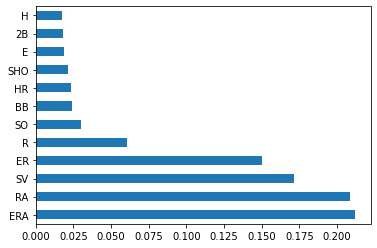

In [100]:

fea_imp =pd.Series(model.feature_importances_, index=X.columns)
fea_imp.nlargest(12).plot(kind='barh')
plt.show()

In [101]:
#let us remove SB and check CV
x8 =X.drop('SB', axis =1)
x=ss.fit_transform(x8)

In [102]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9549644736538976


In [103]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.3932960069369591

In [104]:
# Removing SB increased the accuracy but decreased the CV

In [105]:
#Let us remove all the features less than 0.05 from the above graph and check CV

In [106]:
x9=x6.drop('SB', axis =1)
x9=x9.drop('BB', axis =1)
x9=x9.drop('2B', axis =1)
x9=x9.drop('HR', axis =1)
x9=x9.drop('SO', axis =1)

In [107]:
x9.head()

,R,RA,ER,ERA,SHO,SV
0,6.586172,641,601,3.73,1.162283,4.043051
1,6.546785,700,653,4.07,1.271150,3.828641
2,6.507278,640,584,3.67,1.223156,3.663562
3,6.434547,701,643,3.98,1.194706,3.637586
4,6.536692,803,746,4.64,1.271150,3.583519


In [108]:
x=ss.fit_transform(x9)

In [109]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9373720506428012


In [110]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.5561228553865372

In [111]:
# Here we have removed >50% of data for creating a proper model

In [112]:
#let us see if we can increase the data and maintain 0.5 CV


In [113]:
x10 =x6.drop('BB', axis =1)

In [114]:
x10.head()

,R,2B,HR,SO,SB,RA,ER,ERA,SHO,SV
0,6.586172,300,139,973,104,641,601,3.73,1.162283,4.043051
1,6.546785,277,156,1264,70,700,653,4.07,1.271150,3.828641
2,6.507278,303,141,1157,86,640,584,3.67,1.223156,3.663562
3,6.434547,260,136,1231,68,701,643,3.98,1.194706,3.637586
4,6.536692,289,151,1259,83,803,746,4.64,1.271150,3.583519


In [115]:
x = ss.fit_transform(x10)

In [116]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  23 is:  0.9200119738038641


In [117]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.4600678969366265

In [118]:
x11 =x6.drop('2B', axis =1)

In [119]:
x = ss.fit_transform(x11)

In [120]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  23 is:  0.9184542936819641


In [121]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.45264432052688547

In [122]:
x12 =x6.drop('HR', axis =1)

In [123]:
x = ss.fit_transform(x12)

In [124]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  15 is:  0.921815095190847


In [125]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.46426265266702893

In [143]:
x13 =x6.drop('SO', axis =1)

In [144]:
x = ss.fit_transform(x13)

In [145]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  15 is:  0.9331728764496612


In [146]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.43811486650606496

In [130]:
# Dropping BB, HR, 

In [131]:
x14 =x6.drop('BB', axis =1)
x14 =x14.drop('HR', axis =1)

In [132]:
x = ss.fit_transform(x14)

In [134]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9280387358161462


In [135]:
cross_val_score(algo,x,y,cv=5,scoring='r2')

array([ 0.72094375, -0.86312407,  0.80925777,  0.77904655,  0.91019751])

In [136]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.4712643008793047

In [147]:
x14.head()

,R,2B,SO,SB,RA,ER,ERA,SHO,SV
0,6.586172,300,973,104,641,601,3.73,1.162283,4.043051
1,6.546785,277,1264,70,700,653,4.07,1.271150,3.828641
2,6.507278,303,1157,86,640,584,3.67,1.223156,3.663562
3,6.434547,260,1231,68,701,643,3.98,1.194706,3.637586
4,6.536692,289,1259,83,803,746,4.64,1.271150,3.583519


In [148]:
# We can observe that x9 gives us the R2 Score of 93% and CV of 55% so we will finalize that

In [149]:
x9.head()

,R,RA,ER,ERA,SHO,SV
0,6.586172,641,601,3.73,1.162283,4.043051
1,6.546785,700,653,4.07,1.271150,3.828641
2,6.507278,640,584,3.67,1.223156,3.663562
3,6.434547,701,643,3.98,1.194706,3.637586
4,6.536692,803,746,4.64,1.271150,3.583519


In [150]:
x = ss.fit_transform(x9)

In [151]:
algo = SVR(kernel='linear')
maxr2score(algo,x,y)

Max R2 score corresponding to random state  1 is:  0.9373720506428012


In [152]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.5561228553865372

In [153]:
# let us use GridSearchCV and find best c value

In [158]:
svr =SVR()
parameters = {'kernel':('poly','linear','rbf'),'C': (0.01,0.1,1,2,3,4,5)}
clf = GridSearchCV(svr, parameters, cv=5, scoring='r2')
clf.fit(x,y)
clf.best_params_

{'C': 3, 'kernel': 'linear'}

In [159]:
algo = SVR(kernel='linear', C=3)
maxr2score(algo,x,y)

Max R2 score corresponding to random state  17 is:  0.9536575259649447


In [160]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.5686996615408532

In [161]:
# We will apply KNN and see the r2 score
from sklearn.neighbors import KNeighborsRegressor


In [162]:
knn = KNeighborsRegressor()
neighbors  ={'n_neighbors': range(1,10)}
clf = GridSearchCV(knn, neighbors, cv =5, scoring='r2')
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 1}

In [163]:
algo =KNeighborsRegressor(n_neighbors=1)
maxr2score(algo,x,y)

Max R2 score corresponding to random state  8 is:  0.862743408581768


In [164]:
cross_val_score(algo,x,y,cv=5,scoring='r2').mean()

0.17500145480228807

In [165]:
# Still got better result using SVR. Finalize that create a .obj file

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [167]:
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state=17, test_size=0.3)
svr = SVR(kernel='linear', C=3)
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print("R2 Score is = ",r2_score(y_test,pred))
print("MSE is = ", mean_squared_error(y_test,pred))
print("MAE is = ", mean_absolute_error(y_test,pred))
print(" Cross Validtion score =", cross_val_score(svr,x,y,cv=5, scoring='r2').mean())
        

R2 Score is =  0.9536575259649447
MSE is =  6.003924969430495
MAE is =  2.161343241914495
 Cross Validtion score = 0.5686996615408532


In [168]:
# Creating .obj file

In [173]:
import joblib

In [175]:
joblib.dump(svr,'baseball_svr.pkl')

['baseball_svr.pkl']